In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np 
import h5py
import os
import re
import sys
sys.path.insert(0, '/global/u1/k/kovacs/gcr-catalogs_cosmoDC2_v1.1')
import GCRCatalogs

In [2]:
catalogs = ['cosmoDC2_v1.1_small', 'cosmoDC2_v1.1.4_small']
gcs = []
for catalog in catalogs:
    gc = GCRCatalogs.load_catalog(catalog)
    gcs.append(gc)
    
keys = gcs[0].list_all_native_quantities()
rs_keys = [k for k in keys if 'sequence' in k]
print (rs_keys), 
keys = gcs[0].list_all_quantities()
mass_keys = [k for k in keys if 'mass' in k and 'stellar' not in k]
print ( mass_keys)
quantities = ['redshift', 'mag_g_lsst',  'mag_r_lsst', 'mag_i_lsst', 'mag_z_lsst', 'is_central'] + rs_keys + mass_keys

['baseDC2/is_on_red_sequence_ri', 'baseDC2/is_on_red_sequence_gr']
['halo_mass']


In [3]:
catdata = {}
for catalog, gc in zip(catalogs, gcs):
    catdata[catalog] = gc.get_quantities(quantities)
    data = catdata[catalog]
    data['g-r'] = data['mag_g_lsst'] - data['mag_r_lsst']
    data['r-i'] = data['mag_r_lsst'] - data['mag_i_lsst']
    data['i-z'] = data['mag_i_lsst'] - data['mag_z_lsst']
    print(list(data.keys()))
    
print(list(catdata.keys()))

['is_central', 'baseDC2/is_on_red_sequence_gr', 'mag_r_lsst', 'halo_mass', 'baseDC2/is_on_red_sequence_ri', 'mag_g_lsst', 'redshift', 'mag_i_lsst', 'mag_z_lsst', 'g-r', 'r-i', 'i-z']
['is_central', 'baseDC2/is_on_red_sequence_gr', 'mag_r_lsst', 'halo_mass', 'baseDC2/is_on_red_sequence_ri', 'mag_g_lsst', 'redshift', 'mag_i_lsst', 'mag_z_lsst', 'g-r', 'r-i', 'i-z']
['cosmoDC2_v1.1_small', 'cosmoDC2_v1.1.4_small']


12493
min=0.01912689208984375
12296
min=0.2970123291015625
12296
min=0.21318626403808594
Saving RS_M_gt_1e+13_cosmoDC2_v1.1_small.png
12493
min=0.01912689208984375
12296
min=0.2970123291015625
12296
min=-0.9898357391357422
Saving RS_M_gt_1e+13_cosmoDC2_v1.1.4_small.png


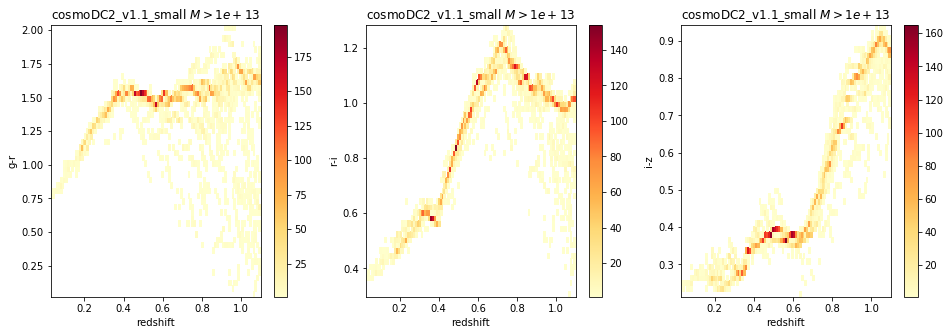

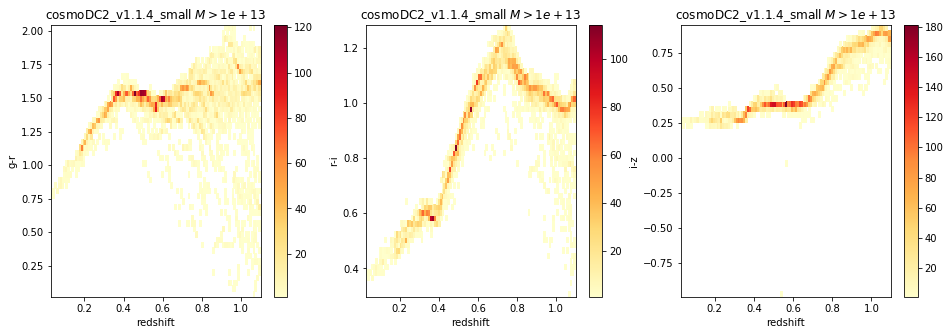

In [4]:
figdir= './'
Nxbins = 110
Nybins = 50
cd2_map = 'YlOrRd'
masscut = 1e13
for catalog in catalogs:
    data = catdata[catalog]
    zmask = data['redshift'] < 1.1
    mmask = data['halo_mass'] > masscut
    fig, ax_all = plt.subplots(1, 3, figsize=(16, 5))
    for color, code, ax  in zip(['g-r', 'r-i', 'i-z'], ['gr', 'ri', 'ri'], ax_all.flat):
        rsmask = (data['is_central']) & (data['baseDC2/is_on_red_sequence_' + code])
        mask = rsmask & zmask & mmask
        print(np.count_nonzero(mask))
        print('min={}'.format(np.min(data[color][mask])))
        CD2, xedges, yedges = np.histogram2d(data['redshift'][mask], 
                                    data[color][mask],
                                    bins=(Nxbins, Nybins))
        CD2masked = np.ma.masked_where(CD2.T==0.0, CD2.T)
        hd2 = ax.pcolormesh(xedges, yedges, CD2masked, cmap=cd2_map)#, alpha=alpha2d)
        cb2 = plt.colorbar(hd2, ax=ax)
        ax.set_xlabel('redshift')
        ax.set_ylabel(color)
        ax.set_title('{} $M > {:.0e}$'.format(catalog, masscut))
        #ax.scatter(data['redshift'][mask], data[color][mask], alpha=0.3)

    figname = 'RS_M_gt_{:.0e}_{}.png'.format(masscut, catalog)
    print('Saving {}'.format(figname))
    figfile = os.path.join(figdir, figname)
    fig.savefig(figfile, bbox_inches='tight')  